## Titanic: Machine Learning from Disaster

Kaggle Competition Description: 

"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
This sensational tragedy shocked the international community and led to better safety regulations for ships.

In this challenge, we ask you to complete the analysis of what sorts of people were likely 
to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers
survived the tragedy."

https://www.kaggle.com/c/titanic

Author - Morgan Fuller

Date - 03/15/2019

Description: In this Kaggle competition, I built a Random Forrest classifier in an attempt to predict the odds of survival for members on the RMS Titanic. I leveraged several features including age, gender, and class. My final model had a prediction accuracy of 81% on my validation data |set. 

### Public Kernals Referenced: 
https://www.kaggle.com/sashr07/kaggle-titanic-tutorial

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

https://www.kaggle.com/c/titanic#tutorials

In [1]:
#import Python Libraries 

#Data Wrangling
import pandas as pd
import numpy as np
import random as rnd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
#churn
#pre-processing labelEncoder
#Confusion and recall (confusion matrix)
#Ensemble

In [7]:
#Import data 

train_df = pd.read_csv('C:/Users/Morgan/Documents/Kaggle/Titanic/train.csv')
test_df = pd.read_csv('C:/Users/Morgan/Documents/Kaggle/Titanic/test.csv')
combine = [train_df, test_df]

In [8]:
#List all fields and field types in both train and test data sets 

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
#Preview data (column header)

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
#preview data (first 5 rows)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
#preview data (last 5 rows)

train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [78]:
#Describe all numerical values 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
#Describe all non-numerical values

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Howard Hugh ""Harry""",male,1601,B96 B98,S
freq,1,577,7,4,644


In [80]:
#correlation between socio-economic class and survial 

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [81]:
#correlation between Emarked and survival

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [93]:
#correlation between Sex and survial 

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [83]:
#correlation between number of siblings + Spouse and survival

train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [84]:
#correlation between number of parents + children and survival

train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


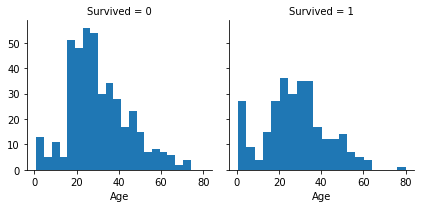

In [85]:
#Histogram of age by survival

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

C:\Users\MF051634\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


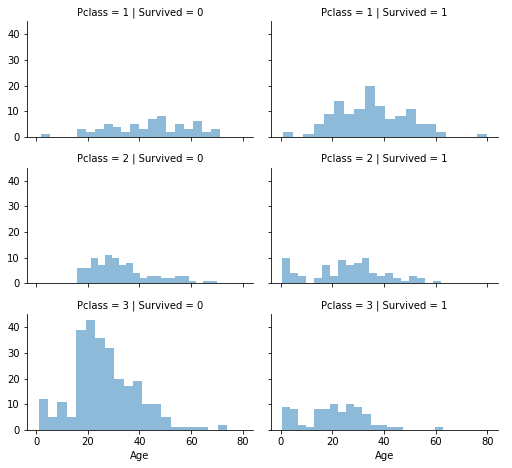

In [86]:
#Histogram of class and age by survival 

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [4]:
#Drop Ticket 
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [9]:
#Can the name field help us in predicting survival? 
print(train_df.Name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [9]:
#generate count of members by title
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [10]:
#Correlation between title and survival
train_df[['Title', 'Survived']].groupby (['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


In [11]:
#Combining titles into a standard format
title_mapping = {   "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"}

for dataset in combine:
    dataset['Title'] = dataset ['Title'].map(title_mapping)
  
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Officer,0.277778
5,Royalty,0.500000


In [12]:
#convert our standard titles into a categorical numerical value via get_dummies
train_df = pd.get_dummies(train_df, columns = ['Title'])
test_df = pd.get_dummies(test_df, columns = ['Title'])
combine = [train_df, test_df]

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [13]:
#now that we have title we can drop the name field. I also dropped passengerid.
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 16), (418, 16))

In [14]:
#Convert Sex to categorical numerical value via get_dummies
train_df = pd.get_dummies(train_df, columns = ['Sex'])
test_df = pd.get_dummies(test_df, columns = ['Sex'])
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,1,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,1,0
3,1,1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0,0,1


In [15]:
#Check for Colinearity between title and Sex
Test = train_df[['Sex_female', 'Sex_male', 'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty']]
Test.corr()

,Sex_female,Sex_male,Survived,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
Sex_female,1.000000,-1.000000,0.543351,-0.159934,0.691548,-0.867334,0.552686,-0.089228,-0.014396
Sex_male,-1.000000,1.000000,-0.543351,0.159934,-0.691548,0.867334,-0.552686,0.089228,0.014396
Survived,0.543351,-0.543351,1.000000,0.085221,0.332795,-0.549199,0.344935,-0.031316,0.016040
Title_Master,-0.159934,0.159934,0.085221,1.000000,-0.110602,-0.254903,-0.088394,-0.031131,-0.014559
Title_Miss,0.691548,-0.691548,0.332795,-0.110602,1.000000,-0.599803,-0.207996,-0.073253,-0.034258
Title_Mr,-0.867334,0.867334,-0.549199,-0.254903,-0.599803,1.000000,-0.479363,-0.168826,-0.078955
Title_Mrs,0.552686,-0.552686,0.344935,-0.088394,-0.207996,-0.479363,1.000000,-0.058544,-0.027379
Title_Officer,-0.089228,0.089228,-0.031316,-0.031131,-0.073253,-0.168826,-0.058544,1.000000,-0.009643
Title_Royalty,-0.014396,0.014396,0.016040,-0.014559,-0.034258,-0.078955,-0.027379,-0.009643,1.000000


In [130]:
#Colinearity is irrelevant when using a classification model. DO NOT DROP SEX
#train_df = train_df.drop(['Sex'], axis=1)
#test_df = test_df.drop(['Sex'], axis=1)
#combine = [train_df, test_df]

#"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 14), (418, 14), (891, 14), (418, 14))

In [102]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,S,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C85,C,0,0,0,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,NaN,S,0,1,0,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,C123,S,0,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,NaN,S,0,0,1,0,0,0,0,1


In [16]:
#Convert Pclass to categorical numerical values via get_dummies
train_df = pd.get_dummies(train_df, columns = ['Pclass'])
test_df = pd.get_dummies(test_df, columns = ['Pclass'])
combine = [train_df, test_df]

train_df.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,0,1,0,0,1
1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,1,0,1,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,1,0,0,0,1
3,1,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,1,0,1,0,0
4,0,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0,0,1,0,0,1


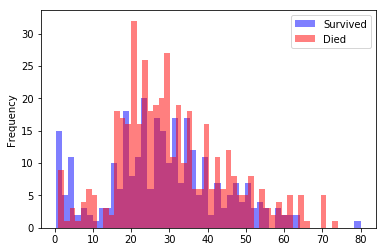

In [69]:
#Lets look at creating age bands 
survived = train_df[train_df["Survived"] == 1]
died = train_df[train_df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
died["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

C:\Users\MF051634\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MF051634\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\MF051634\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


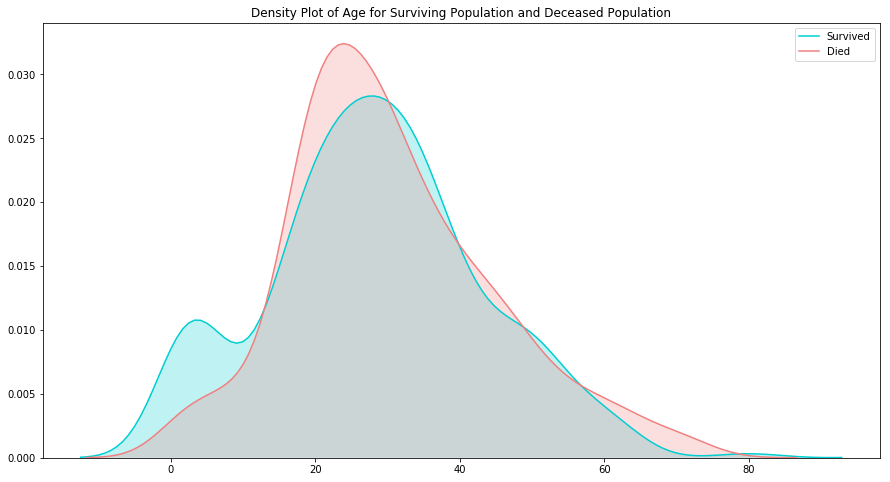

In [3]:
#Density plot of survival by age
plt.figure(figsize=(15,8))
sns.kdeplot(train_df["Age"][train_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Age"][train_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

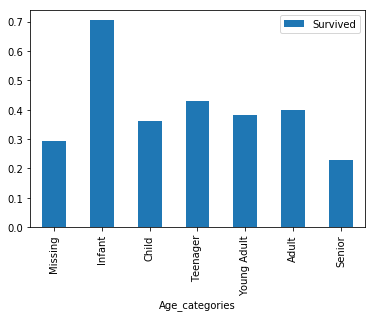

In [17]:
#Convert age to age groupings
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train_df = process_age(train_df,cut_points,label_names)
test_df = process_age(test_df,cut_points,label_names)

age_cat_pivot = train_df.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [18]:
train_df = pd.get_dummies(train_df, columns = ['Age_categories'])
test_df = pd.get_dummies(test_df, columns = ['Age_categories'])
combine = [train_df, test_df]

In [19]:
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)
combine = [train_df, test_df]

print(train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

(891, 25) (418, 25) (891, 25) (418, 25)


In [25]:
print(train_df.columns.values)

['Survived' 'SibSp' 'Parch' 'Fare' 'Cabin' 'Embarked' 'Title_Master'
 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Officer' 'Title_Royalty'
 'Sex_female' 'Sex_male' 'Pclass_1' 'Pclass_2' 'Pclass_3'
 'Age_categories_Missing' 'Age_categories_Infant' 'Age_categories_Child'
 'Age_categories_Teenager' 'Age_categories_Young Adult'
 'Age_categories_Adult' 'Age_categories_Senior']


In [20]:
#Define independent variables
titanic_features = ['Title_Master',
 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Child',
 'Age_categories_Teenager', 'Age_categories_Young Adult',
 'Age_categories_Adult', 'Age_categories_Senior']

X = train_df[titanic_features]
X.describe()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.044893,0.206510,0.580247,0.142536,0.020202,0.004489,0.352413,0.647587,0.242424,0.206510,0.551066,0.198653,0.049383,0.028058,0.078563,0.401796,0.218855,0.024691
std,0.207186,0.405028,0.493796,0.349796,0.140770,0.066890,0.477990,0.477990,0.428790,0.405028,0.497665,0.399210,0.216787,0.165232,0.269207,0.490536,0.413702,0.155270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#Define our dependent variable 
y = train_df['Survived']

In [22]:
#Split our training data set into 2 groupings. a training set and a validation set.
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 0)

In [23]:
#Generate our model
model = RandomForestClassifier(n_estimators=500)
model.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
#This is pretty low. 
print (model.score( train_X, train_y), model.score (val_X, val_y))

0.8263473053892215 0.8116591928251121


In [ ]:
#How can we improve?
#are independent variables statistically significant. 
#Include a traveled alone or number of family members on board. 
#Include a flag for embarked location
#We could impute values based on the mean for the sample group. 
    #Mean age = 29.3
    #Mean Fare = $32
    #Impute cabin based on fair, ticket and family members


In [41]:
#Generate a confusion matrix based on our predictions and actual survival
from sklearn.metrics import confusion_matrix
predictions = model.predict(X)
conf_matrix = confusion_matrix(y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,509,40
Died,118,224


In [46]:
#Apply the model to our test data set
X = test_df[titanic_features]
predictions = model.predict(X)

In [56]:
#Generate a dataframe of our submission data set
submission_df = {"PassengerId": test_df['PassengerId'],
                 "Survived": predictions}
submission = pd.DataFrame(submission_df)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [55]:
#Convert dataframe to CSV
submission.to_csv('titanic_submission.csv', index=False)

In [ ]:
#Final submission score .76555 (76.5%)
#leaderboard spot 7,400 / 10,129